In [5]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def lyapunov_spectrum_lorenz(sigma, rho, beta, dt=0.01, T=10, epsilon=1e-8):
    """
    Calculate the Lyapunov spectrum for the Lorenz system.
    """
    # Initial state and initial perturbation
    x0 = np.array([1.0, 1.0, 1.0])
    n = len(x0)
    perturbations = [x0 + epsilon * np.eye(1, n, k).flatten() for k in range(n)]

    # Arrays to store divergence over time for each direction
    lyapunov_exponents = np.zeros(n)
    t_span = [0, T]
    t_eval = np.arange(0, T, dt)
    
    # Evolve system over time and calculate divergence
    for i, pert in enumerate(perturbations):
        solution = solve_ivp(lorenz, t_span, x0, args=(sigma, rho, beta), t_eval=t_eval)
        solution_perturbed = solve_ivp(lorenz, t_span, pert, args=(sigma, rho, beta), t_eval=t_eval)

        # Calculate divergence in each direction
        divergence = []
        for k in range(len(t_eval)):
            dist = np.linalg.norm(solution.y[:, k] - solution_perturbed.y[:, k])
            divergence.append(np.log(dist / epsilon) if dist > 0 else 0)
        lyapunov_exponents[i] = np.mean(divergence) / T

    return lyapunov_exponents

# Parameters for Lorenz system
sigma, rho, beta = 10, 28, 8 / 3
lyapunov_spectrum = lyapunov_spectrum_lorenz(sigma, rho, beta)
print("Lyapunov Spectrum for Lorenz System:", lyapunov_spectrum)


Lyapunov Spectrum for Lorenz System: [-0.01740192  0.09633301  0.05931438]


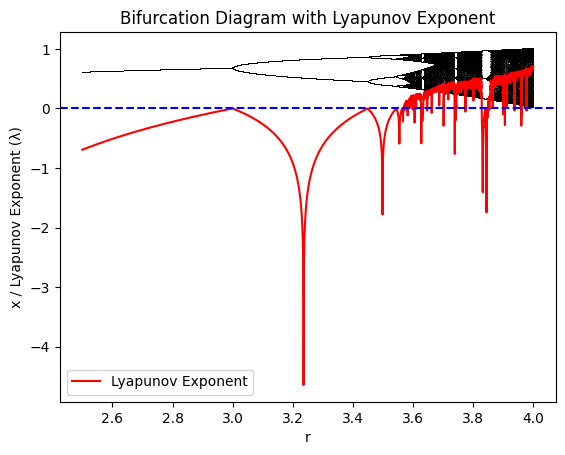

In [2]:
def logistic_map(r, x):
    return r * x * (1 - x)

def bifurcation_and_lyapunov(r_values, iterations=1000, last=100):
    x = 1e-5 * np.ones(len(r_values))
    lyapunov_exponents = np.zeros(len(r_values))
    bifurcation_points = []

    for i in range(iterations):
        x = logistic_map(r_values, x)
        
        # Lyapunov calculation
        if i >= (iterations - last):
            lyapunov_exponents += np.log(abs(r_values * (1 - 2 * x)))
            bifurcation_points.append((r_values.copy(), x.copy()))

    lyapunov_exponents = lyapunov_exponents / last

    # Plot bifurcation diagram
    for r, x in bifurcation_points:
        plt.plot(r, x, ',k', alpha=0.25)

    # Plot Lyapunov exponent
    plt.plot(r_values, lyapunov_exponents, color='red', label="Lyapunov Exponent")
    plt.axhline(0, color='blue', linestyle='--')
    plt.xlabel("r")
    plt.ylabel("x / Lyapunov Exponent (λ)")
    plt.legend()
    plt.title("Bifurcation Diagram with Lyapunov Exponent")
    plt.show()

# Parameters for bifurcation
r_values = np.linspace(2.5, 4.0, 5000)
bifurcation_and_lyapunov(r_values)


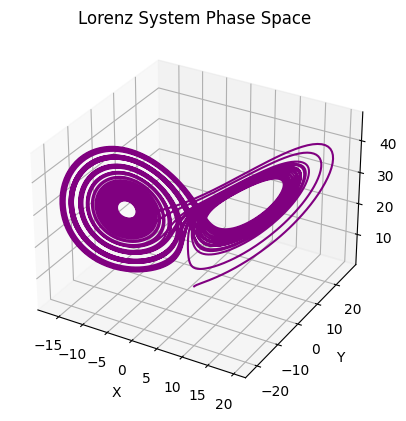

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def plot_phase_space_lorenz(sigma=10, rho=28, beta=8/3, T=50):
    # Initial conditions
    x0 = np.array([1.0, 1.0, 1.0])
    t_span = [0, T]
    t_eval = np.linspace(0, T, 10000)
    
    # Solve Lorenz system
    solution = solve_ivp(lorenz, t_span, x0, args=(sigma, rho, beta), t_eval=t_eval)
    
    # 3D plot of phase space
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(solution.y[0], solution.y[1], solution.y[2], color='purple')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.title("Lorenz System Phase Space")
    plt.show()

# Plot phase space for the Lorenz system
plot_phase_space_lorenz()
